# Bayesian Blocks example with Geminga

In [1]:
%matplotlib inline
from importlib import reload
import main, light_curve
import warnings
warnings.filterwarnings('error')

### Load timed data and weights for Geminga
Create 1-day binned summary, and light curve from it with Poisson fits

In [3]:
cdata = main.Main('Geminga',  interval=1, mjd_range=None,        
                 weight_file='/nfs/farm/g/glast/g/catalog/pointlike/curr/uw9011/geminga_weights.pkl')
cbw=cdata.binned_weights()
lcp = light_curve.LightCurve(cbw, rep='poisson', min_exp=0.1) 

Source Geminga at: (l,b)=(195.134,4.266); ROI radius=5
Loading data from 127 months 
	Selected 1344372 photons within 5 deg of  (195.13,4.27)
	Dates: 2008-08-04 15:45 - 2018-08-02 18:48
	MJD  : 54682.7          - 58332.8         
Default binning: 3650 intervals of 1 days, in range (54683.0, 58333.0)
Adding weights from file /nfs/farm/g/glast/g/catalog/pointlike/skymodels/P8_10years/uw9011/geminga_weights.pkl
	242 / 1331395 photon pixels are outside weight region
	212440 weights set to NaN
Loaded 3587 / 3650 cells with exposure > 0.1 for light curve analysis
Fits using representation poisson: 3587 intervals
  columns: ['t', 'tw', 'counts', 'fexp', 'flux', 'errors', 'limit', 'ts', 'poiss'] 


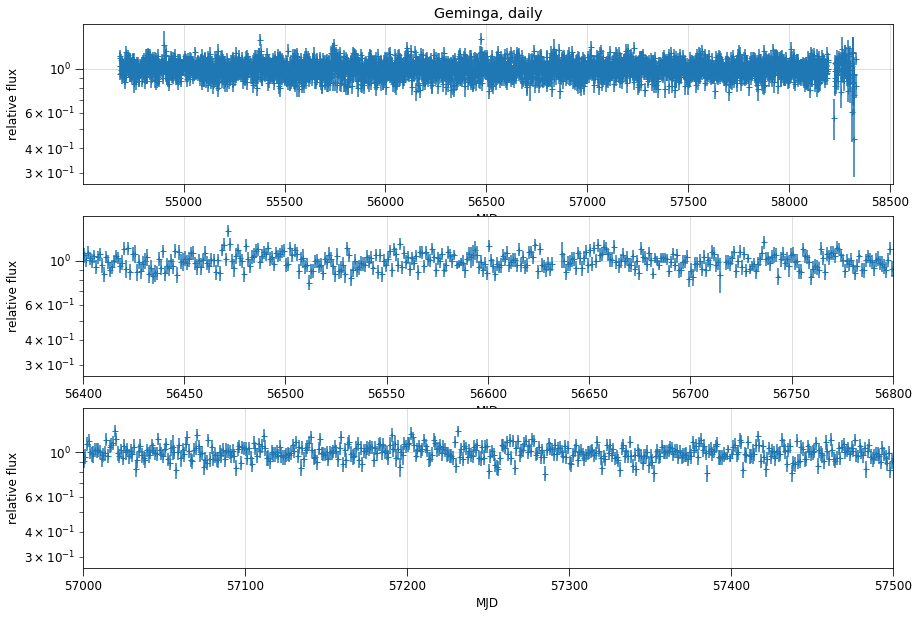

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,10))
lcp.flux_plot(ax=ax1, yscale='log', title='Geminga, daily');
lcp.flux_plot(ax=ax2, yscale='log', xlim=(56400, 56800), title=' ')
lcp.flux_plot(ax=ax3, yscale='log', xlim=(57000, 57500), title=' ');

### Make Bayesian Block partitions, here using counts only|


In [5]:
bb = light_curve.BayesianBlocks(lcp)
%time edges =  bb.partition()

Partitioned 3587 cells into 13 blocks, with prior 6.6
 Used FitnessFunc class <class 'light_curve.MyFitness'> 
CPU times: user 657 ms, sys: 1e+03 µs, total: 658 ms
Wall time: 671 ms


### Now make a light curve with the BB partitions, and plot that

In [6]:
lc =bb.light_curve(edges, min_exp=0.01)

Loaded 13 / 13 cells with exposure > 0.01 for light curve analysis
Fits using representation poisson: 13 intervals
  columns: ['t', 'tw', 'counts', 'fexp', 'flux', 'errors', 'limit', 'ts', 'poiss'] 


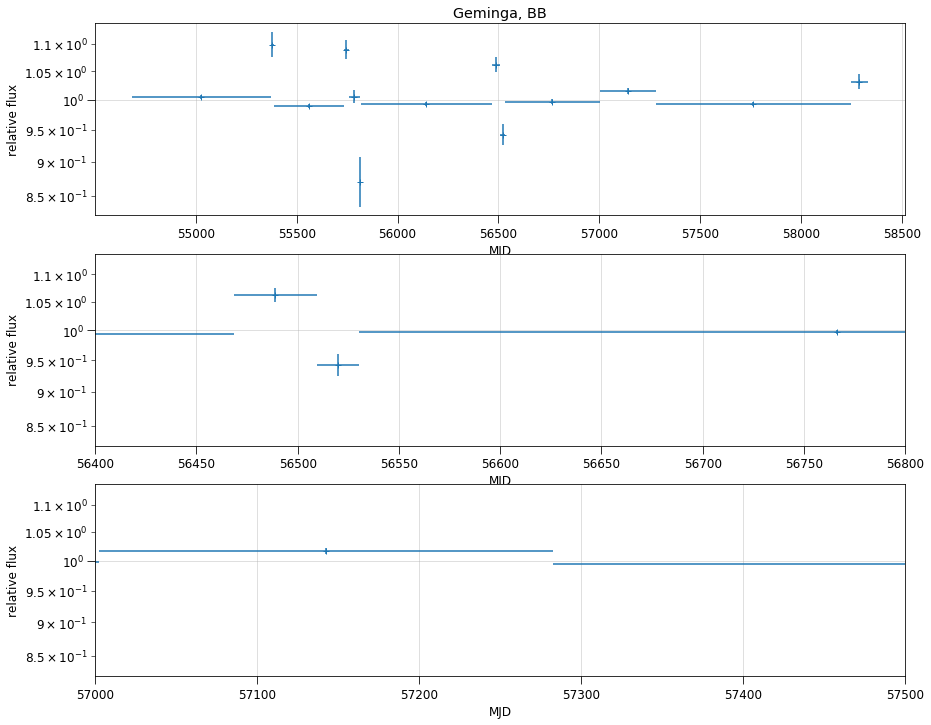

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,12))
lc.flux_plot(ax=ax1, yscale='log',  title='Geminga, BB');
lc.flux_plot(ax=ax2, yscale='log',  xlim=(56400, 56800), title=' ')
lc.flux_plot(ax=ax3, yscale='log',  xlim=(57000, 57500), title=' ');